In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from scipy import stats
from sklearn.linear_model import LinearRegression

In [86]:
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
matplotlib.rcParams['figure.dpi'] = 150

### Washington (WA) — Lincoln, Okanogan, Skagit, Spokane, Whitman

#### Average temperature, with data from 1895 onwards (annual)

In [87]:
# Lincoln (avg_temp)
df_avg_temp_Lincoln = pd.read_csv("Data_KS_WA/WA/WA_Climate/WA_Lincoln_Avg_Temp_Additional.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_avg_temp_Lincoln.rename(columns={'Value':'Avg_Temp'}, inplace=True)
df_avg_temp_Lincoln['Year'] = df_avg_temp_Lincoln['Date'].apply(lambda x: int(str(x)[:4]))
df_avg_temp_Lincoln['Month'] = df_avg_temp_Lincoln['Date'].apply(lambda x: int(str(x)[-2:]))
df_avg_temp_Lincoln = df_avg_temp_Lincoln.drop(['Date'], axis=1)

# Okanogan (avg_temp)
df_avg_temp_Okanogan = pd.read_csv("Data_KS_WA/WA/WA_Climate/WA_Okanogan_Avg_Temp_Additional.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_avg_temp_Okanogan.rename(columns={'Value':'Avg_Temp'}, inplace=True)
df_avg_temp_Okanogan['Year'] = df_avg_temp_Okanogan['Date'].apply(lambda x: int(str(x)[:4]))
df_avg_temp_Okanogan['Month'] = df_avg_temp_Okanogan['Date'].apply(lambda x: int(str(x)[-2:]))
df_avg_temp_Okanogan = df_avg_temp_Okanogan.drop(['Date'], axis=1)

# Skagit (avg_temp)
df_avg_temp_Skagit = pd.read_csv("Data_KS_WA/WA/WA_Climate/WA_Skagit_Avg_Temp_Additional.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_avg_temp_Skagit.rename(columns={'Value':'Avg_Temp'}, inplace=True)
df_avg_temp_Skagit['Year'] = df_avg_temp_Skagit['Date'].apply(lambda x: int(str(x)[:4]))
df_avg_temp_Skagit['Month'] = df_avg_temp_Skagit['Date'].apply(lambda x: int(str(x)[-2:]))
df_avg_temp_Skagit = df_avg_temp_Skagit.drop(['Date'], axis=1)

# Spokane (avg_temp)
df_avg_temp_Spokane = pd.read_csv("Data_KS_WA/WA/WA_Climate/WA_Spokane_Avg_Temp_Additional.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_avg_temp_Spokane.rename(columns={'Value':'Avg_Temp'}, inplace=True)
df_avg_temp_Spokane['Year'] = df_avg_temp_Spokane['Date'].apply(lambda x: int(str(x)[:4]))
df_avg_temp_Spokane['Month'] = df_avg_temp_Spokane['Date'].apply(lambda x: int(str(x)[-2:]))
df_avg_temp_Spokane = df_avg_temp_Spokane.drop(['Date'], axis=1)

# Whitman (avg_temp)
df_avg_temp_Whitman = pd.read_csv("Data_KS_WA/WA/WA_Climate/WA_Whitman_Avg_Temp_Additional.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_avg_temp_Whitman.rename(columns={'Value':'Avg_Temp'}, inplace=True)
df_avg_temp_Whitman['Year'] = df_avg_temp_Whitman['Date'].apply(lambda x: int(str(x)[:4]))
df_avg_temp_Whitman['Month'] = df_avg_temp_Whitman['Date'].apply(lambda x: int(str(x)[-2:]))
df_avg_temp_Whitman = df_avg_temp_Whitman.drop(['Date'], axis=1)

# Testing (avg_temp)
#df_avg_temp_Lincoln.head()

In [88]:
df_avg_temp_Lincoln['County'] = "Lincoln"
df_avg_temp_Okanogan['County'] = "Okanogan"
df_avg_temp_Skagit['County'] = "Skagit"
df_avg_temp_Spokane['County'] = "Spokane"
df_avg_temp_Whitman['County'] = "Whitman"
avg_temp_frames_WA = [df_avg_temp_Lincoln, df_avg_temp_Okanogan, df_avg_temp_Skagit, df_avg_temp_Spokane, df_avg_temp_Whitman]
df_avg_temp_WA = pd.concat(avg_temp_frames_WA) # contains all WA counties
df_avg_temp_WA['Month'] = df_avg_temp_WA.Month.map('{:02}'.format)
df_avg_temp_WA['Day'] = 1
df_avg_temp_WA['Date'] = pd.to_datetime(df_avg_temp_WA[['Year', 'Month', 'Day']])
df_avg_temp_WA['month_year'] = pd.to_datetime(df_avg_temp_WA['Date']).dt.to_period('M')
#df_avg_temp_WA.head(12)

In [89]:
# Annual average temperature, by county

df_avg_temp_WA_annual = df_avg_temp_WA[['County', 'Date', 'Avg_Temp']]
df_avg_temp_Lincoln_annual, df_avg_temp_Okanogan_annual, df_avg_temp_Skagit_annual, df_avg_temp_Spokane_annual, df_avg_temp_Whitman_annual = [x for _, x in df_avg_temp_WA_annual.groupby(df_avg_temp_WA_annual['County'])]

# Lincoln
df_avg_temp_Lincoln_annual = df_avg_temp_Lincoln_annual.set_index('Date').resample('A').mean()
df_avg_temp_Lincoln_annual['County'] = 'Lincoln'
df_avg_temp_Lincoln_annual.reset_index(level=0, inplace=True)
df_avg_temp_Lincoln_annual['Year'] = df_avg_temp_Lincoln_annual['Date'].dt.year

# Okanogan
df_avg_temp_Okanogan_annual = df_avg_temp_Okanogan_annual.set_index('Date').resample('A').mean()
df_avg_temp_Okanogan_annual['County'] = 'Okanogan'
df_avg_temp_Okanogan_annual.reset_index(level=0, inplace=True)
df_avg_temp_Okanogan_annual['Year'] = df_avg_temp_Okanogan_annual['Date'].dt.year

# Skagit
df_avg_temp_Skagit_annual = df_avg_temp_Skagit_annual.set_index('Date').resample('A').mean()
df_avg_temp_Skagit_annual['County'] = 'Skagit'
df_avg_temp_Skagit_annual.reset_index(level=0, inplace=True)
df_avg_temp_Skagit_annual['Year'] = df_avg_temp_Skagit_annual['Date'].dt.year

# Spokane
df_avg_temp_Spokane_annual = df_avg_temp_Spokane_annual.set_index('Date').resample('A').mean()
df_avg_temp_Spokane_annual['County'] = 'Spokane'
df_avg_temp_Spokane_annual.reset_index(level=0, inplace=True)
df_avg_temp_Spokane_annual['Year'] = df_avg_temp_Spokane_annual['Date'].dt.year

# Whitman
df_avg_temp_Whitman_annual = df_avg_temp_Whitman_annual.set_index('Date').resample('A').mean()
df_avg_temp_Whitman_annual['County'] = 'Whitman'
df_avg_temp_Whitman_annual.reset_index(level=0, inplace=True)
df_avg_temp_Whitman_annual['Year'] = df_avg_temp_Whitman_annual['Date'].dt.year

df_avg_temp_WA_annual = pd.concat([df_avg_temp_Lincoln_annual, df_avg_temp_Okanogan_annual, df_avg_temp_Skagit_annual, df_avg_temp_Spokane_annual, df_avg_temp_Whitman_annual])
#df_avg_temp_WA_annual.head(60)

R^2 value: 0.0781152860986507
m: [[0.01040492]]
b: [25.97758034]


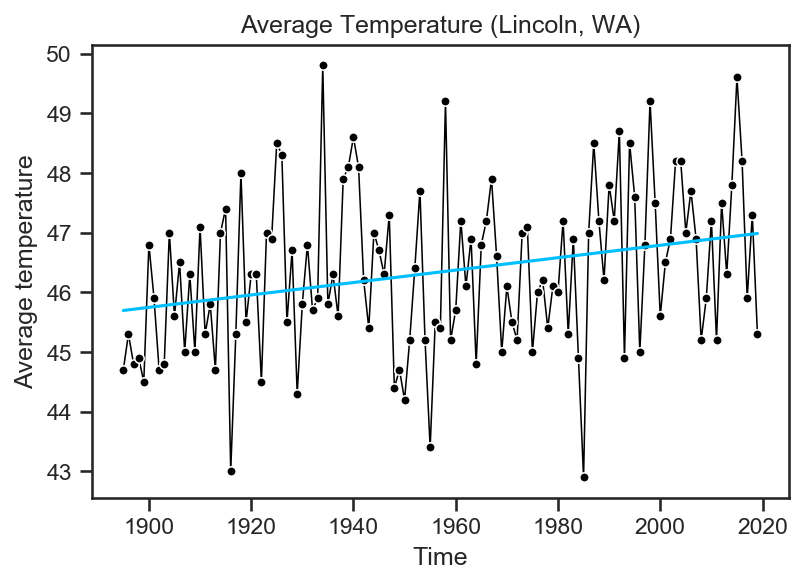

In [90]:
# Lincoln

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_avg_temp_plot = sns.lineplot(x='Year', y='Avg_Temp', data=df_avg_temp_Lincoln_annual, color='black', marker='o')
annual_avg_temp_plot.set(xlabel='Time', ylabel='Average temperature')

# Linear regression
x, y = df_avg_temp_Lincoln_annual['Year'].to_numpy(), df_avg_temp_Lincoln_annual['Avg_Temp'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='deepskyblue')
plt.title('Average Temperature (Lincoln, WA)')
plt.show()

R^2 value: 0.16003114067473034
m: [[0.01543646]]
b: [11.79258751]


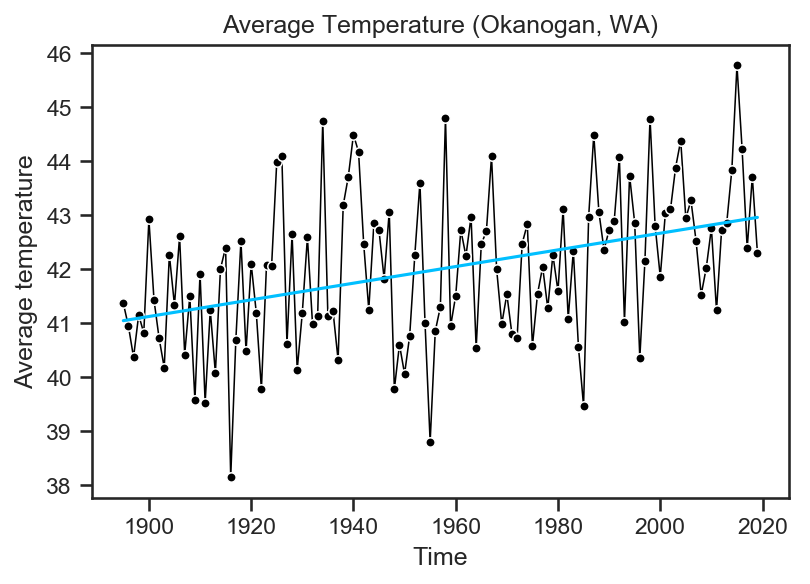

In [91]:
# Okanogan

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_avg_temp_plot = sns.lineplot(x='Year', y='Avg_Temp', data=df_avg_temp_Okanogan_annual, color='black', marker='o')
annual_avg_temp_plot.set(xlabel='Time', ylabel='Average temperature')

# Linear regression
x, y = df_avg_temp_Okanogan_annual['Year'].to_numpy(), df_avg_temp_Okanogan_annual['Avg_Temp'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='deepskyblue')
plt.title('Average Temperature (Okanogan, WA)')
plt.show()

R^2 value: 0.17178765192018097
m: [[0.01361705]]
b: [18.65649846]


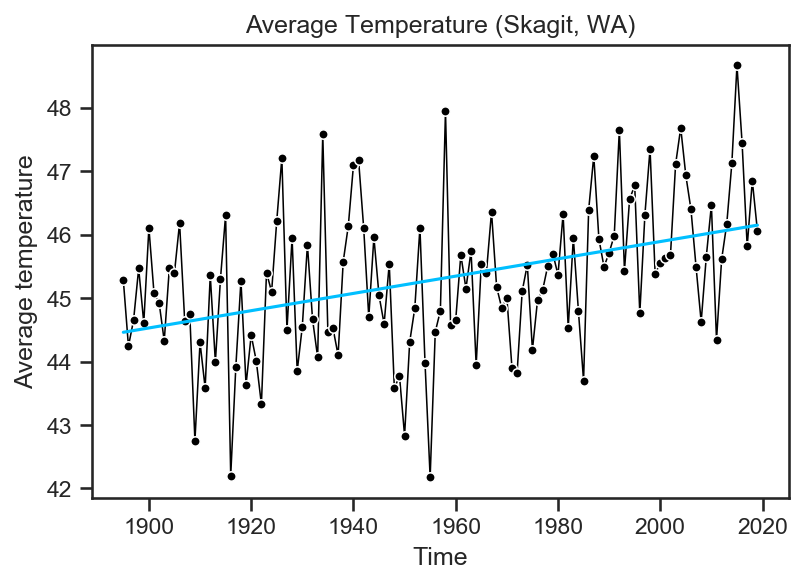

In [92]:
# Skagit

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_avg_temp_plot = sns.lineplot(x='Year', y='Avg_Temp', data=df_avg_temp_Skagit_annual, color='black', marker='o')
annual_avg_temp_plot.set(xlabel='Time', ylabel='Average temperature')

# Linear regression
x, y = df_avg_temp_Skagit_annual['Year'].to_numpy(), df_avg_temp_Skagit_annual['Avg_Temp'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='deepskyblue')
plt.title('Average Temperature (Skagit, WA)')
plt.show()

R^2 value: 0.17020513957363415
m: [[0.01567271]]
b: [15.38890917]


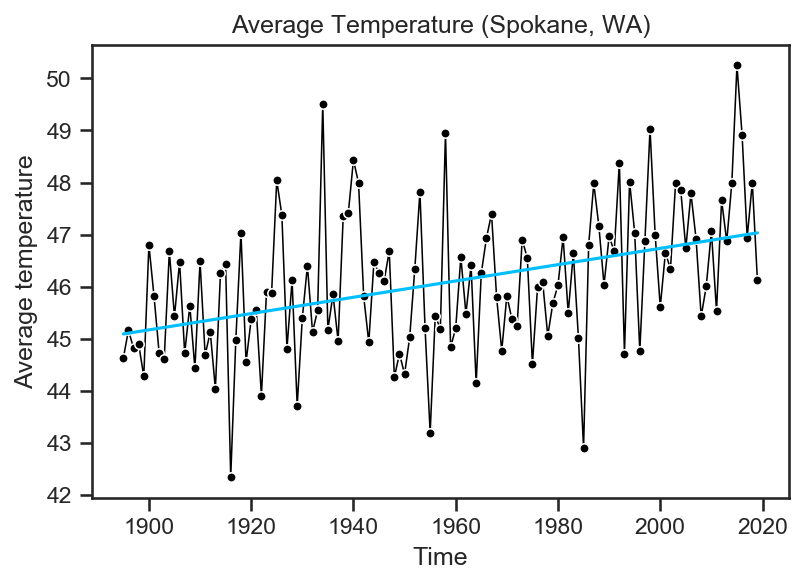

In [93]:
# Spokane

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_avg_temp_plot = sns.lineplot(x='Year', y='Avg_Temp', data=df_avg_temp_Spokane_annual, color='black', marker='o')
annual_avg_temp_plot.set(xlabel='Time', ylabel='Average temperature')

# Linear regression
x, y = df_avg_temp_Spokane_annual['Year'].to_numpy(), df_avg_temp_Spokane_annual['Avg_Temp'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='deepskyblue')
plt.title('Average Temperature (Spokane, WA)')
plt.show()

R^2 value: 0.23234939138666155
m: [[0.01857465]]
b: [11.77120138]


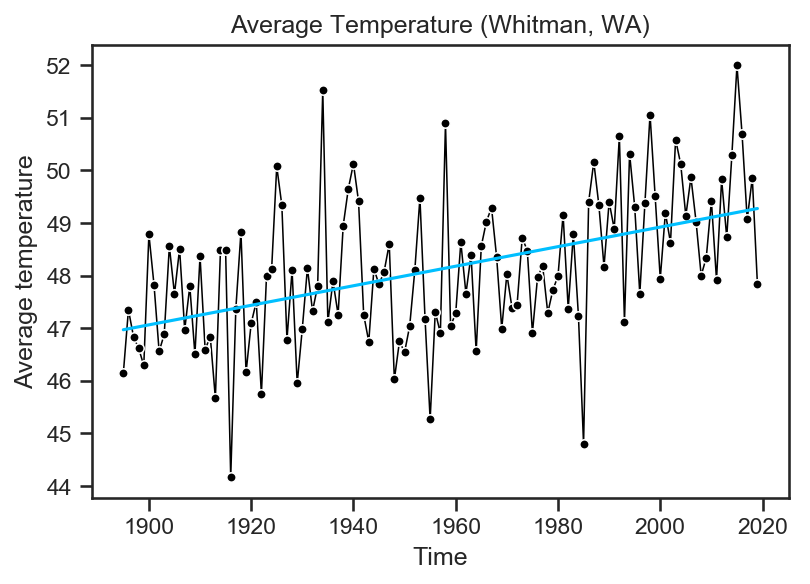

In [94]:
# Whitman

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_avg_temp_plot = sns.lineplot(x='Year', y='Avg_Temp', data=df_avg_temp_Whitman_annual, color='black', marker='o')
annual_avg_temp_plot.set(xlabel='Time', ylabel='Average temperature')

# Linear regression
x, y = df_avg_temp_Whitman_annual['Year'].to_numpy(), df_avg_temp_Whitman_annual['Avg_Temp'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='deepskyblue')
plt.title('Average Temperature (Whitman, WA)')
plt.show()

#### Precipitation, with data from 1989 onwards (annual)

In [95]:
# Lincoln (precipitation)
df_precipitation_Lincoln = pd.read_csv("Data_KS_WA/WA/WA_Climate/WA_Lincoln_Precipitation.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_precipitation_Lincoln.rename(columns={'Value':'Precipitation'}, inplace=True)
df_precipitation_Lincoln['Year'] = df_precipitation_Lincoln['Date'].apply(lambda x: int(str(x)[:4]))
df_precipitation_Lincoln['Month'] = df_precipitation_Lincoln['Date'].apply(lambda x: int(str(x)[-2:]))
df_precipitation_Lincoln = df_precipitation_Lincoln.drop(['Date'], axis=1)

# Okanogan (precipitation)
df_precipitation_Okanogan = pd.read_csv("Data_KS_WA/WA/WA_Climate/WA_Okanogan_Precipitation.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_precipitation_Okanogan.rename(columns={'Value':'Precipitation'}, inplace=True)
df_precipitation_Okanogan['Year'] = df_precipitation_Okanogan['Date'].apply(lambda x: int(str(x)[:4]))
df_precipitation_Okanogan['Month'] = df_precipitation_Okanogan['Date'].apply(lambda x: int(str(x)[-2:]))
df_precipitation_Okanogan = df_precipitation_Okanogan.drop(['Date'], axis=1)

# Skagit (precipitation)
df_precipitation_Skagit = pd.read_csv("Data_KS_WA/WA/WA_Climate/WA_Skagit_Precipitation.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_precipitation_Skagit.rename(columns={'Value':'Precipitation'}, inplace=True)
df_precipitation_Skagit['Year'] = df_precipitation_Skagit['Date'].apply(lambda x: int(str(x)[:4]))
df_precipitation_Skagit['Month'] = df_precipitation_Skagit['Date'].apply(lambda x: int(str(x)[-2:]))
df_precipitation_Skagit = df_precipitation_Skagit.drop(['Date'], axis=1)

# Spokane (precipitation)
df_precipitation_Spokane = pd.read_csv("Data_KS_WA/WA/WA_Climate/WA_Spokane_Precipitation.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_precipitation_Spokane.rename(columns={'Value':'Precipitation'}, inplace=True)
df_precipitation_Spokane['Year'] = df_precipitation_Spokane['Date'].apply(lambda x: int(str(x)[:4]))
df_precipitation_Spokane['Month'] = df_precipitation_Spokane['Date'].apply(lambda x: int(str(x)[-2:]))
df_precipitation_Spokane = df_precipitation_Spokane.drop(['Date'], axis=1)

# Whitman (precipitation)
df_precipitation_Whitman = pd.read_csv("Data_KS_WA/WA/WA_Climate/WA_Whitman_Precipitation.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_precipitation_Whitman.rename(columns={'Value':'Precipitation'}, inplace=True)
df_precipitation_Whitman['Year'] = df_precipitation_Whitman['Date'].apply(lambda x: int(str(x)[:4]))
df_precipitation_Whitman['Month'] = df_precipitation_Whitman['Date'].apply(lambda x: int(str(x)[-2:]))
df_precipitation_Whitman = df_precipitation_Whitman.drop(['Date'], axis=1)

# Testing (precipitation)
#df_precipitation_Spokane.head()

In [96]:
df_precipitation_Lincoln['County'] = "Lincoln"
df_precipitation_Okanogan['County'] = "Okanogan"
df_precipitation_Skagit['County'] = "Skagit"
df_precipitation_Spokane['County'] = "Spokane"
df_precipitation_Whitman['County'] = "Whitman"
precipitation_frames_WA = [df_precipitation_Lincoln, df_precipitation_Okanogan, df_precipitation_Skagit, df_precipitation_Spokane, df_precipitation_Whitman]
df_precipitation_WA = pd.concat(precipitation_frames_WA) # contains all WA counties
df_precipitation_WA['Month'] = df_precipitation_WA.Month.map('{:02}'.format)
df_precipitation_WA['Day'] = 1
df_precipitation_WA['Date'] = pd.to_datetime(df_precipitation_WA[['Year', 'Month', 'Day']])
df_precipitation_WA['month_year'] = pd.to_datetime(df_precipitation_WA['Date']).dt.to_period('M')

In [97]:
# Annual precipitation, by county

df_precipitation_WA_annual = df_precipitation_WA[['County', 'Date', 'Precipitation']]
df_precipitation_Lincoln_annual, df_precipitation_Okanogan_annual, df_precipitation_Skagit_annual, df_precipitation_Spokane_annual, df_precipitation_Whitman_annual = [x for _, x in df_precipitation_WA_annual.groupby(df_precipitation_WA_annual['County'])]

# Lincoln
df_precipitation_Lincoln_annual = df_precipitation_Lincoln_annual.set_index('Date').resample('A').mean()
df_precipitation_Lincoln_annual['County'] = 'Lincoln'
df_precipitation_Lincoln_annual.reset_index(level=0, inplace=True)
df_precipitation_Lincoln_annual['Year'] = df_precipitation_Lincoln_annual['Date'].dt.year

# Okanogan
df_precipitation_Okanogan_annual = df_precipitation_Okanogan_annual.set_index('Date').resample('A').mean()
df_precipitation_Okanogan_annual['County'] = 'Okanogan'
df_precipitation_Okanogan_annual.reset_index(level=0, inplace=True)
df_precipitation_Okanogan_annual['Year'] = df_precipitation_Okanogan_annual['Date'].dt.year

# Skagit
df_precipitation_Skagit_annual = df_precipitation_Skagit_annual.set_index('Date').resample('A').mean()
df_precipitation_Skagit_annual['County'] = 'Skagit'
df_precipitation_Skagit_annual.reset_index(level=0, inplace=True)
df_precipitation_Skagit_annual['Year'] = df_precipitation_Skagit_annual['Date'].dt.year

# Spokane
df_precipitation_Spokane_annual = df_precipitation_Spokane_annual.set_index('Date').resample('A').mean()
df_precipitation_Spokane_annual['County'] = 'Spokane'
df_precipitation_Spokane_annual.reset_index(level=0, inplace=True)
df_precipitation_Spokane_annual['Year'] = df_precipitation_Spokane_annual['Date'].dt.year

# Whitman
df_precipitation_Whitman_annual = df_precipitation_Whitman_annual.set_index('Date').resample('A').mean()
df_precipitation_Whitman_annual['County'] = 'Whitman'
df_precipitation_Whitman_annual.reset_index(level=0, inplace=True)
df_precipitation_Whitman_annual['Year'] = df_precipitation_Whitman_annual['Date'].dt.year

df_precipitation_WA_annual = pd.concat([df_precipitation_Lincoln_annual, df_precipitation_Okanogan_annual, df_precipitation_Skagit_annual, df_precipitation_Spokane_annual, df_precipitation_Whitman_annual])
#df_precipitation_WA_annual.head(60)

R^2 value: 0.00017189952404550457
m: [[-0.0003315]]
b: [1.75648729]


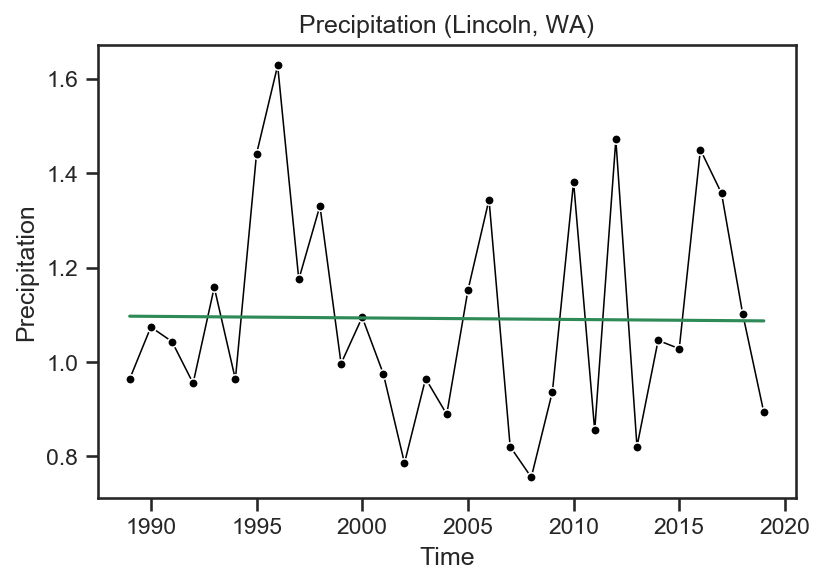

In [98]:
# Lincoln

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_precipitation_plot = sns.lineplot(x='Year', y='Precipitation', data=df_precipitation_Lincoln_annual, color='black', marker='o')
annual_precipitation_plot.set(xlabel='Time', ylabel='Precipitation')

# Linear regression
x, y = df_precipitation_Lincoln_annual['Year'].to_numpy(), df_precipitation_Lincoln_annual['Precipitation'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='seagreen')
plt.title('Precipitation (Lincoln, WA)')
plt.show()

R^2 value: 0.001045432085241993
m: [[-0.00120702]]
b: [4.35703238]


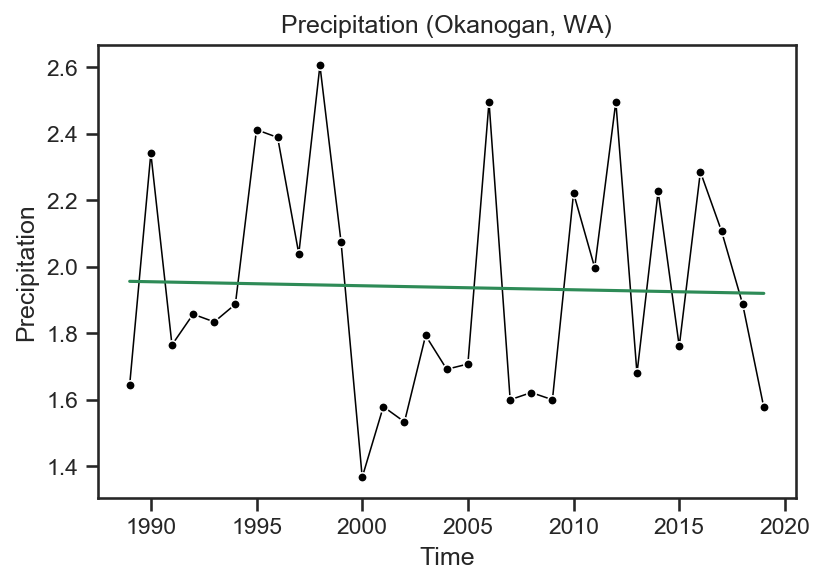

In [99]:
# Okanogan

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_precipitation_plot = sns.lineplot(x='Year', y='Precipitation', data=df_precipitation_Okanogan_annual, color='black', marker='o')
annual_precipitation_plot.set(xlabel='Time', ylabel='Precipitation')

# Linear regression
x, y = df_precipitation_Okanogan_annual['Year'].to_numpy(), df_precipitation_Okanogan_annual['Precipitation'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='seagreen')
plt.title('Precipitation (Okanogan, WA)')
plt.show()

R^2 value: 0.0020395551922115507
m: [[0.00498124]]
b: [-3.31957551]


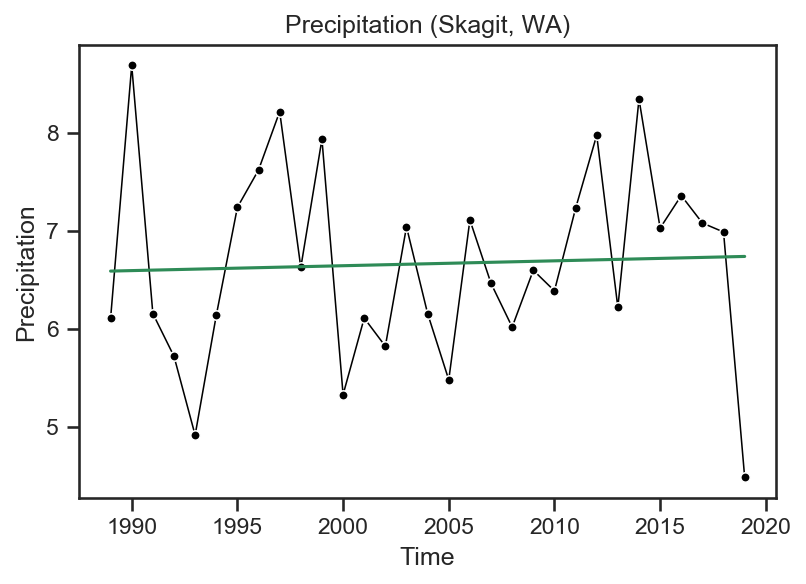

In [100]:
# Skagit

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_precipitation_plot = sns.lineplot(x='Year', y='Precipitation', data=df_precipitation_Skagit_annual, color='black', marker='o')
annual_precipitation_plot.set(xlabel='Time', ylabel='Precipitation')

# Linear regression
x, y = df_precipitation_Skagit_annual['Year'].to_numpy(), df_precipitation_Skagit_annual['Precipitation'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='seagreen')
plt.title('Precipitation (Skagit, WA)')
plt.show()

R^2 value: 0.0018555261395921674
m: [[0.00129555]]
b: [-0.89300477]


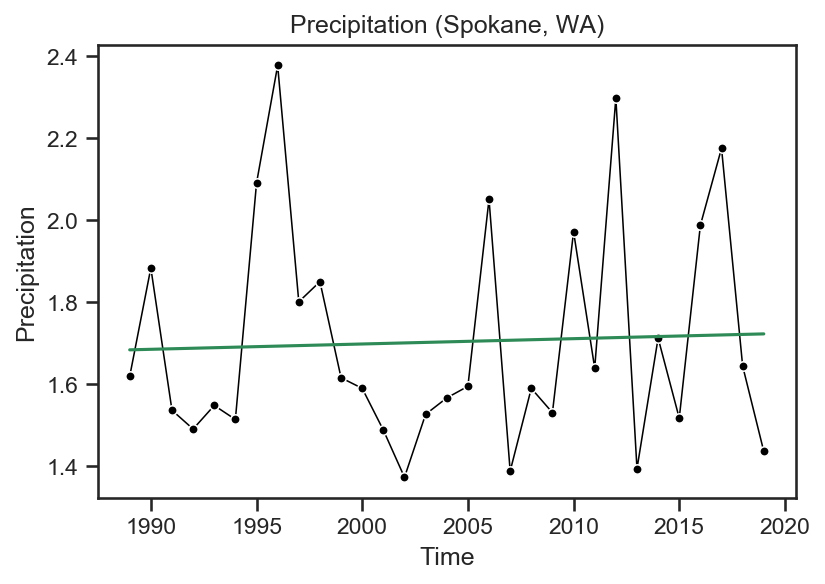

In [101]:
# Spokane

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_precipitation_plot = sns.lineplot(x='Year', y='Precipitation', data=df_precipitation_Spokane_annual, color='black', marker='o')
annual_precipitation_plot.set(xlabel='Time', ylabel='Precipitation')

# Linear regression
x, y = df_precipitation_Spokane_annual['Year'].to_numpy(), df_precipitation_Spokane_annual['Precipitation'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='seagreen')
plt.title('Precipitation (Spokane, WA)')
plt.show()

R^2 value: 0.0020228371530918166
m: [[0.00113352]]
b: [-0.79482979]


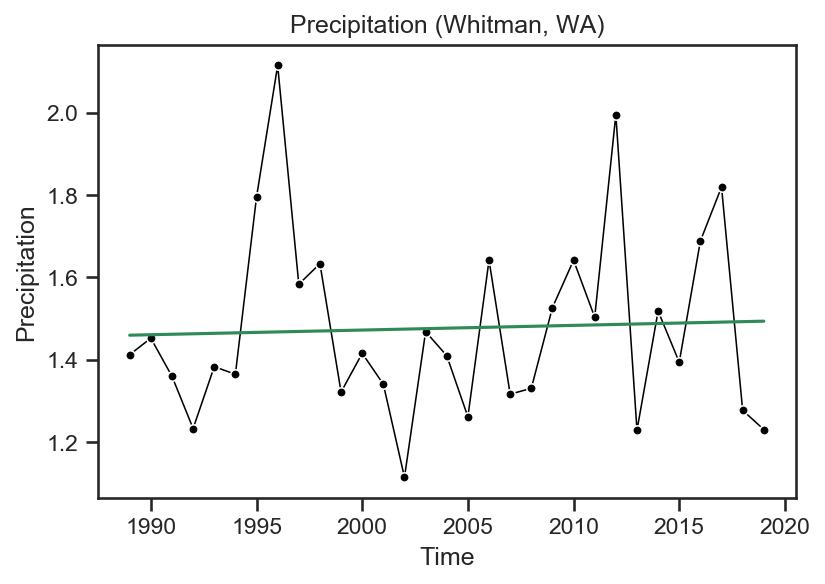

In [102]:
# Whitman

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_precipitation_plot = sns.lineplot(x='Year', y='Precipitation', data=df_precipitation_Whitman_annual, color='black', marker='o')
annual_precipitation_plot.set(xlabel='Time', ylabel='Precipitation')

# Linear regression
x, y = df_precipitation_Whitman_annual['Year'].to_numpy(), df_precipitation_Whitman_annual['Precipitation'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='seagreen')
plt.title('Precipitation (Whitman, WA)')
plt.show()

#### Drought (PDSI), with data from 1989 onwards (annual)

In [125]:
df_drought_WA = pd.read_csv("Data_KS_WA/WA/WA_Climate/WA_PDSI.csv", skiprows=3).drop(['Anomaly'], axis=1)
df_drought_WA.rename(columns={'Value':'PDSI'}, inplace=True)
df_drought_WA['Year'] = df_drought_WA['Date'].apply(lambda x: int(str(x)[:4]))
df_drought_WA['Month'] = df_drought_WA['Date'].apply(lambda x: int(str(x)[-2:]))
df_drought_WA = df_drought_WA.drop(['Date'], axis=1)

# Testing (drought)
#df_drought_WA.head()

In [126]:
df_drought_WA['Month'] = df_drought_WA.Month.map('{:02}'.format)
df_drought_WA['Day'] = 1
df_drought_WA['Date'] = pd.to_datetime(df_drought_WA[['Year', 'Month', 'Day']])
df_drought_WA['month_year'] = pd.to_datetime(df_drought_WA['Date']).dt.to_period('M')

In [127]:
# Annual drought

df_drought_WA_annual = df_drought_WA[['Date', 'PDSI']]
df_drought_WA_annual = df_drought_WA_annual.set_index('Date').resample('A').mean()
df_drought_WA_annual.reset_index(level=0, inplace=True)
df_drought_WA_annual['Year'] = df_drought_WA_annual['Date'].dt.year

R^2 value: 0.018307660292097072
m: [[-0.02227129]]
b: [44.51817119]


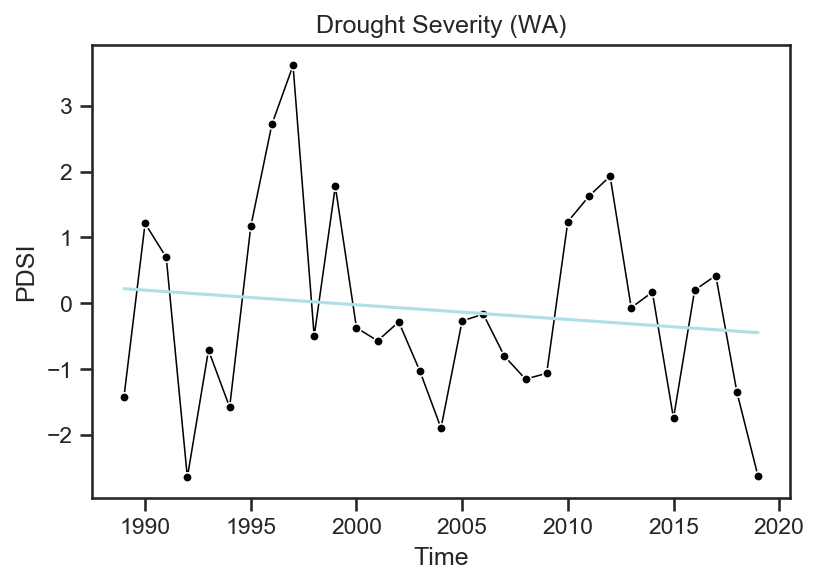

In [134]:
sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_drought_plot = sns.lineplot(x='Year', y='PDSI', data=df_drought_WA_annual, color='black', marker='o')
annual_drought_plot.set(xlabel='Time', ylabel='PDSI')

# Linear regression
x, y = df_drought_WA_annual['Year'].to_numpy(), df_drought_WA_annual['PDSI'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='powderblue')
plt.title('Drought Severity (WA)')
plt.show()

### Kansas (KS) — Grant, Gray, Haskell, Kearny, Morton

#### Average temperature, with data from 1895 onwards (annual)

In [103]:
# Grant (avg_temp)
df_avg_temp_Grant = pd.read_csv("Data_KS_WA/KS/KS_Climate/KS_Grant_Avg_Temp_Additional.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_avg_temp_Grant.rename(columns={'Value':'Avg_Temp'}, inplace=True)
df_avg_temp_Grant['Year'] = df_avg_temp_Grant['Date'].apply(lambda x: int(str(x)[:4]))
df_avg_temp_Grant['Month'] = df_avg_temp_Grant['Date'].apply(lambda x: int(str(x)[-2:]))
df_avg_temp_Grant = df_avg_temp_Grant.drop(['Date'], axis=1)

# Gray (avg_temp)
df_avg_temp_Gray = pd.read_csv("Data_KS_WA/KS/KS_Climate/KS_Gray_Avg_Temp_Additional.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_avg_temp_Gray.rename(columns={'Value':'Avg_Temp'}, inplace=True)
df_avg_temp_Gray['Year'] = df_avg_temp_Gray['Date'].apply(lambda x: int(str(x)[:4]))
df_avg_temp_Gray['Month'] = df_avg_temp_Gray['Date'].apply(lambda x: int(str(x)[-2:]))
df_avg_temp_Gray = df_avg_temp_Gray.drop(['Date'], axis=1)

# Haskell (avg_temp)
df_avg_temp_Haskell = pd.read_csv("Data_KS_WA/KS/KS_Climate/KS_Haskell_Avg_Temp_Additional.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_avg_temp_Haskell.rename(columns={'Value':'Avg_Temp'}, inplace=True)
df_avg_temp_Haskell['Year'] = df_avg_temp_Haskell['Date'].apply(lambda x: int(str(x)[:4]))
df_avg_temp_Haskell['Month'] = df_avg_temp_Haskell['Date'].apply(lambda x: int(str(x)[-2:]))
df_avg_temp_Haskell = df_avg_temp_Haskell.drop(['Date'], axis=1)

# Kearny (avg_temp)
df_avg_temp_Kearny = pd.read_csv("Data_KS_WA/KS/KS_Climate/KS_Kearny_Avg_Temp_Additional.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_avg_temp_Kearny.rename(columns={'Value':'Avg_Temp'}, inplace=True)
df_avg_temp_Kearny['Year'] = df_avg_temp_Kearny['Date'].apply(lambda x: int(str(x)[:4]))
df_avg_temp_Kearny['Month'] = df_avg_temp_Kearny['Date'].apply(lambda x: int(str(x)[-2:]))
df_avg_temp_Kearny = df_avg_temp_Kearny.drop(['Date'], axis=1)

# Morton (avg_temp)
df_avg_temp_Morton = pd.read_csv("Data_KS_WA/KS/KS_Climate/KS_Morton_Avg_Temp_Additional.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_avg_temp_Morton.rename(columns={'Value':'Avg_Temp'}, inplace=True)
df_avg_temp_Morton['Year'] = df_avg_temp_Morton['Date'].apply(lambda x: int(str(x)[:4]))
df_avg_temp_Morton['Month'] = df_avg_temp_Morton['Date'].apply(lambda x: int(str(x)[-2:]))
df_avg_temp_Morton = df_avg_temp_Morton.drop(['Date'], axis=1)

# Testing (avg_temp)
#df_avg_temp_Haskell.head()

In [104]:
# Average temperature
df_avg_temp_Grant['County'] = "Grant"
df_avg_temp_Gray['County'] = "Gray"
df_avg_temp_Haskell['County'] = "Haskell"
df_avg_temp_Kearny['County'] = "Kearny"
df_avg_temp_Morton['County'] = "Morton"
avg_temp_frames_KS = [df_avg_temp_Grant, df_avg_temp_Gray, df_avg_temp_Haskell, df_avg_temp_Kearny, df_avg_temp_Morton]
df_avg_temp_KS = pd.concat(avg_temp_frames_KS) # contains all KS counties
df_avg_temp_KS['Month'] = df_avg_temp_KS.Month.map('{:02}'.format)
df_avg_temp_KS['Day'] = 1
df_avg_temp_KS['Date'] = pd.to_datetime(df_avg_temp_KS[['Year', 'Month', 'Day']])
df_avg_temp_KS['month_year'] = pd.to_datetime(df_avg_temp_KS['Date']).dt.to_period('M')
#df_avg_temp_KS.head(12)

In [105]:
# Annual average temperature, by county

df_avg_temp_KS_annual = df_avg_temp_KS[['County', 'Date', 'Avg_Temp']]
df_avg_temp_Grant_annual, df_avg_temp_Gray_annual, df_avg_temp_Haskell_annual, df_avg_temp_Kearny_annual, df_avg_temp_Morton_annual = [x for _, x in df_avg_temp_KS_annual.groupby(df_avg_temp_KS_annual['County'])]

# Grant
df_avg_temp_Grant_annual = df_avg_temp_Grant_annual.set_index('Date').resample('A').mean()
df_avg_temp_Grant_annual['County'] = 'Grant'
df_avg_temp_Grant_annual.reset_index(level=0, inplace=True)
df_avg_temp_Grant_annual['Year'] = df_avg_temp_Grant_annual['Date'].dt.year

# Gray
df_avg_temp_Gray_annual = df_avg_temp_Gray_annual.set_index('Date').resample('A').mean()
df_avg_temp_Gray_annual['County'] = 'Gray'
df_avg_temp_Gray_annual.reset_index(level=0, inplace=True)
df_avg_temp_Gray_annual['Year'] = df_avg_temp_Gray_annual['Date'].dt.year

# Haskell
df_avg_temp_Haskell_annual = df_avg_temp_Haskell_annual.set_index('Date').resample('A').mean()
df_avg_temp_Haskell_annual['County'] = 'Haskell'
df_avg_temp_Haskell_annual.reset_index(level=0, inplace=True)
df_avg_temp_Haskell_annual['Year'] = df_avg_temp_Haskell_annual['Date'].dt.year

# Kearny
df_avg_temp_Kearny_annual = df_avg_temp_Kearny_annual.set_index('Date').resample('A').mean()
df_avg_temp_Kearny_annual['County'] = 'Kearny'
df_avg_temp_Kearny_annual.reset_index(level=0, inplace=True)
df_avg_temp_Kearny_annual['Year'] = df_avg_temp_Kearny_annual['Date'].dt.year

# Morton
df_avg_temp_Morton_annual = df_avg_temp_Morton_annual.set_index('Date').resample('A').mean()
df_avg_temp_Morton_annual['County'] = 'Morton'
df_avg_temp_Morton_annual.reset_index(level=0, inplace=True)
df_avg_temp_Morton_annual['Year'] = df_avg_temp_Morton_annual['Date'].dt.year

df_avg_temp_KS_annual = pd.concat([df_avg_temp_Grant_annual, df_avg_temp_Gray_annual, df_avg_temp_Haskell_annual, df_avg_temp_Kearny_annual, df_avg_temp_Morton_annual])
#df_avg_temp_KS_annual.head(60)

R^2 value: 0.1511100421538062
m: [[0.01476175]]
b: [25.688853]


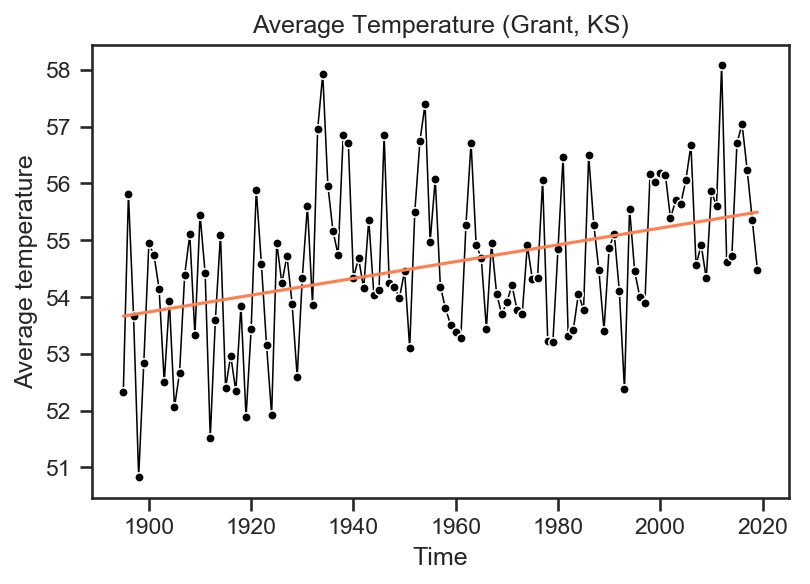

In [106]:
# Grant

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_avg_temp_plot = sns.lineplot(x='Year', y='Avg_Temp', data=df_avg_temp_Grant_annual, color='black', marker='o')
annual_avg_temp_plot.set(xlabel='Time', ylabel='Average temperature')

# Linear regression
x, y = df_avg_temp_Grant_annual['Year'].to_numpy(), df_avg_temp_Grant_annual['Avg_Temp'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='coral')
plt.title('Average Temperature (Grant, KS)')
plt.show()

R^2 value: 0.16232424815483762
m: [[0.0156385]]
b: [23.73671265]


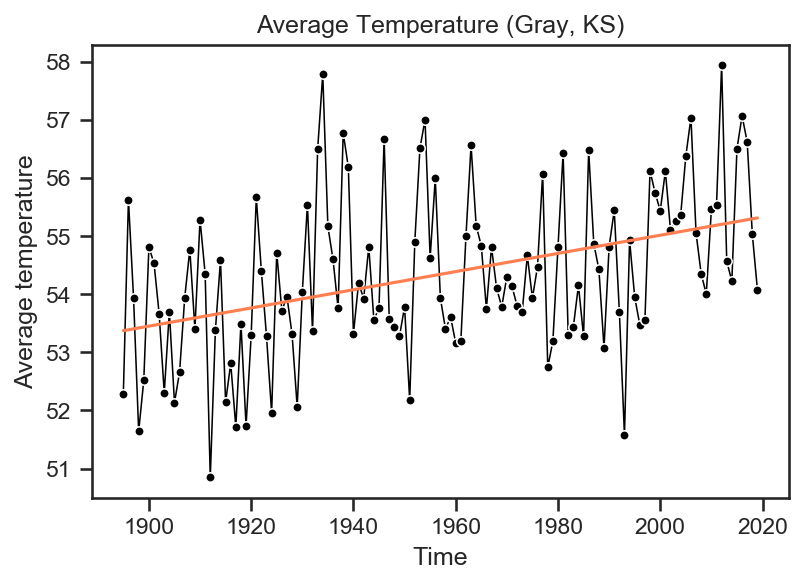

In [107]:
# Gray

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_avg_temp_plot = sns.lineplot(x='Year', y='Avg_Temp', data=df_avg_temp_Gray_annual, color='black', marker='o')
annual_avg_temp_plot.set(xlabel='Time', ylabel='Average temperature')

# Linear regression
x, y = df_avg_temp_Gray_annual['Year'].to_numpy(), df_avg_temp_Gray_annual['Avg_Temp'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='coral')
plt.title('Average Temperature (Gray, KS)')
plt.show()

R^2 value: 0.15869634240096664
m: [[0.01538536]]
b: [24.37312524]


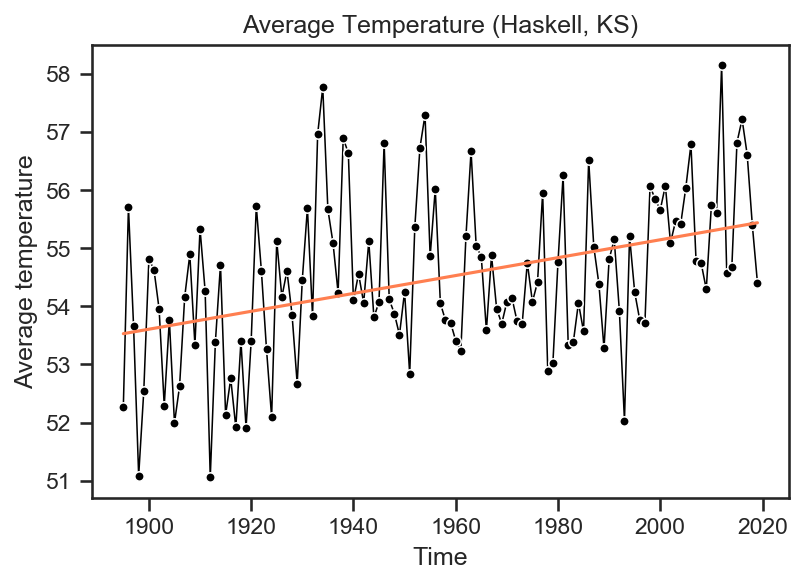

In [108]:
# Haskell

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_avg_temp_plot = sns.lineplot(x='Year', y='Avg_Temp', data=df_avg_temp_Haskell_annual, color='black', marker='o')
annual_avg_temp_plot.set(xlabel='Time', ylabel='Average temperature')

# Linear regression
x, y = df_avg_temp_Haskell_annual['Year'].to_numpy(), df_avg_temp_Haskell_annual['Avg_Temp'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='coral')
plt.title('Average Temperature (Haskell, KS)')
plt.show()

R^2 value: 0.2141698366567243
m: [[0.01879498]]
b: [16.83528674]


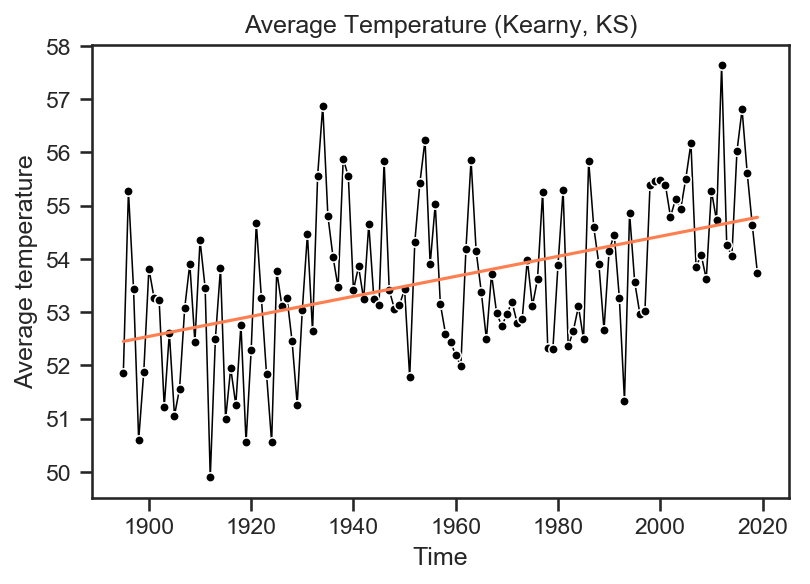

In [109]:
# Kearny

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_avg_temp_plot = sns.lineplot(x='Year', y='Avg_Temp', data=df_avg_temp_Kearny_annual, color='black', marker='o')
annual_avg_temp_plot.set(xlabel='Time', ylabel='Average temperature')

# Linear regression
x, y = df_avg_temp_Kearny_annual['Year'].to_numpy(), df_avg_temp_Kearny_annual['Avg_Temp'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='coral')
plt.title('Average Temperature (Kearny, KS)')
plt.show()

R^2 value: 0.11975062188815011
m: [[0.0124147]]
b: [30.85437455]


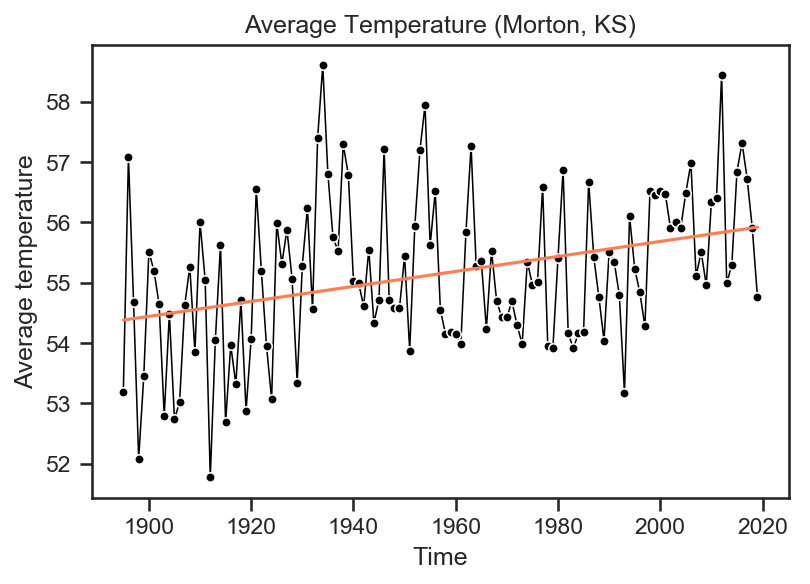

In [110]:
# Morton

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_avg_temp_plot = sns.lineplot(x='Year', y='Avg_Temp', data=df_avg_temp_Morton_annual, color='black', marker='o')
annual_avg_temp_plot.set(xlabel='Time', ylabel='Average temperature')

# Linear regression
x, y = df_avg_temp_Morton_annual['Year'].to_numpy(), df_avg_temp_Morton_annual['Avg_Temp'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='coral')
plt.title('Average Temperature (Morton, KS)')
plt.show()

#### Precipitation, with data from 1989 onwards (annual)

In [111]:
# Grant (precipitation)
df_precipitation_Grant = pd.read_csv("Data_KS_WA/KS/KS_Climate/KS_Grant_Precipitation.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_precipitation_Grant.rename(columns={'Value':'Precipitation'}, inplace=True)
df_precipitation_Grant['Year'] = df_precipitation_Grant['Date'].apply(lambda x: int(str(x)[:4]))
df_precipitation_Grant['Month'] = df_precipitation_Grant['Date'].apply(lambda x: int(str(x)[-2:]))
df_precipitation_Grant = df_precipitation_Grant.drop(['Date'], axis=1)

# Gray (precipitation)
df_precipitation_Gray = pd.read_csv("Data_KS_WA/KS/KS_Climate/KS_Gray_Precipitation.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_precipitation_Gray.rename(columns={'Value':'Precipitation'}, inplace=True)
df_precipitation_Gray['Year'] = df_precipitation_Gray['Date'].apply(lambda x: int(str(x)[:4]))
df_precipitation_Gray['Month'] = df_precipitation_Gray['Date'].apply(lambda x: int(str(x)[-2:]))
df_precipitation_Gray = df_precipitation_Gray.drop(['Date'], axis=1)

# Haskell (precipitation)
df_precipitation_Haskell = pd.read_csv("Data_KS_WA/KS/KS_Climate/KS_Haskell_Precipitation.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_precipitation_Haskell.rename(columns={'Value':'Precipitation'}, inplace=True)
df_precipitation_Haskell['Year'] = df_precipitation_Haskell['Date'].apply(lambda x: int(str(x)[:4]))
df_precipitation_Haskell['Month'] = df_precipitation_Haskell['Date'].apply(lambda x: int(str(x)[-2:]))
df_precipitation_Haskell = df_precipitation_Haskell.drop(['Date'], axis=1)

# Kearny (precipitation)
df_precipitation_Kearny = pd.read_csv("Data_KS_WA/KS/KS_Climate/KS_Kearny_Precipitation.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_precipitation_Kearny.rename(columns={'Value':'Precipitation'}, inplace=True)
df_precipitation_Kearny['Year'] = df_precipitation_Kearny['Date'].apply(lambda x: int(str(x)[:4]))
df_precipitation_Kearny['Month'] = df_precipitation_Kearny['Date'].apply(lambda x: int(str(x)[-2:]))
df_precipitation_Kearny = df_precipitation_Kearny.drop(['Date'], axis=1)

# Morton (precipitation)
df_precipitation_Morton = pd.read_csv("Data_KS_WA/KS/KS_Climate/KS_Morton_Precipitation.csv", skiprows=4).drop(['Anomaly'], axis=1)
df_precipitation_Morton.rename(columns={'Value':'Precipitation'}, inplace=True)
df_precipitation_Morton['Year'] = df_precipitation_Morton['Date'].apply(lambda x: int(str(x)[:4]))
df_precipitation_Morton['Month'] = df_precipitation_Morton['Date'].apply(lambda x: int(str(x)[-2:]))
df_precipitation_Morton = df_precipitation_Morton.drop(['Date'], axis=1)

# Testing (precipitation)
#df_precipitation_Gray.head()

In [112]:
df_precipitation_Grant['County'] = "Grant"
df_precipitation_Gray['County'] = "Gray"
df_precipitation_Haskell['County'] = "Haskell"
df_precipitation_Kearny['County'] = "Kearny"
df_precipitation_Morton['County'] = "Morton"
precipitation_frames_KS = [df_precipitation_Grant, df_precipitation_Gray, df_precipitation_Haskell, df_precipitation_Kearny, df_precipitation_Morton]
df_precipitation_KS = pd.concat(precipitation_frames_KS) # contains all KS counties
df_precipitation_KS['Month'] = df_precipitation_KS.Month.map('{:02}'.format)
df_precipitation_KS['Day'] = 1
df_precipitation_KS['Date'] = pd.to_datetime(df_precipitation_KS[['Year', 'Month', 'Day']])
df_precipitation_KS['month_year'] = pd.to_datetime(df_precipitation_KS['Date']).dt.to_period('M')

In [113]:
# Annual precipitation, by county

df_precipitation_KS_annual = df_precipitation_KS[['County', 'Date', 'Precipitation']]
df_precipitation_Grant_annual, df_precipitation_Gray_annual, df_precipitation_Haskell_annual, df_precipitation_Kearny_annual, df_precipitation_Morton_annual = [x for _, x in df_precipitation_KS_annual.groupby(df_precipitation_KS_annual['County'])]

# Grant
df_precipitation_Grant_annual = df_precipitation_Grant_annual.set_index('Date').resample('A').mean()
df_precipitation_Grant_annual['County'] = 'Grant'
df_precipitation_Grant_annual.reset_index(level=0, inplace=True)
df_precipitation_Grant_annual['Year'] = df_precipitation_Grant_annual['Date'].dt.year

# Gray
df_precipitation_Gray_annual = df_precipitation_Gray_annual.set_index('Date').resample('A').mean()
df_precipitation_Gray_annual['County'] = 'Gray'
df_precipitation_Gray_annual.reset_index(level=0, inplace=True)
df_precipitation_Gray_annual['Year'] = df_precipitation_Gray_annual['Date'].dt.year

# Haskell
df_precipitation_Haskell_annual = df_precipitation_Haskell_annual.set_index('Date').resample('A').mean()
df_precipitation_Haskell_annual['County'] = 'Haskell'
df_precipitation_Haskell_annual.reset_index(level=0, inplace=True)
df_precipitation_Haskell_annual['Year'] = df_precipitation_Haskell_annual['Date'].dt.year

# Kearny
df_precipitation_Kearny_annual = df_precipitation_Kearny_annual.set_index('Date').resample('A').mean()
df_precipitation_Kearny_annual['County'] = 'Kearny'
df_precipitation_Kearny_annual.reset_index(level=0, inplace=True)
df_precipitation_Kearny_annual['Year'] = df_precipitation_Kearny_annual['Date'].dt.year

# Morton
df_precipitation_Morton_annual = df_precipitation_Morton_annual.set_index('Date').resample('A').mean()
df_precipitation_Morton_annual['County'] = 'Morton'
df_precipitation_Morton_annual.reset_index(level=0, inplace=True)
df_precipitation_Morton_annual['Year'] = df_precipitation_Morton_annual['Date'].dt.year

df_precipitation_KS_annual = pd.concat([df_precipitation_Grant_annual, df_precipitation_Gray_annual, df_precipitation_Haskell_annual, df_precipitation_Kearny_annual, df_precipitation_Morton_annual])
#df_precipitation_KS_annual.head(60)

R^2 value: 0.022689617304376464
m: [[-0.00547956]]
b: [12.53006342]


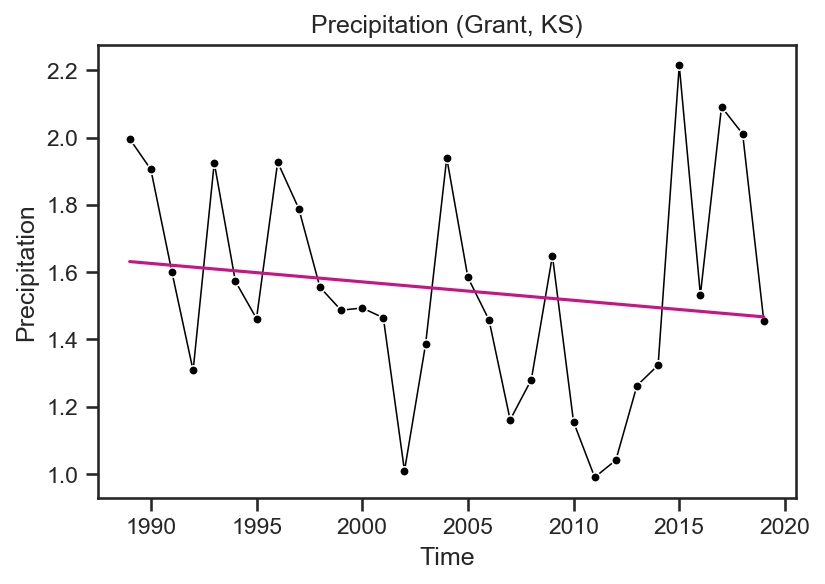

In [114]:
# Grant

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_precipitation_plot = sns.lineplot(x='Year', y='Precipitation', data=df_precipitation_Grant_annual, color='black', marker='o')
annual_precipitation_plot.set(xlabel='Time', ylabel='Precipitation')

# Linear regression
x, y = df_precipitation_Grant_annual['Year'].to_numpy(), df_precipitation_Grant_annual['Precipitation'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='mediumvioletred')
plt.title('Precipitation (Grant, KS)')
plt.show()

R^2 value: 0.0005971577412242635
m: [[0.00096676]]
b: [-0.18357136]


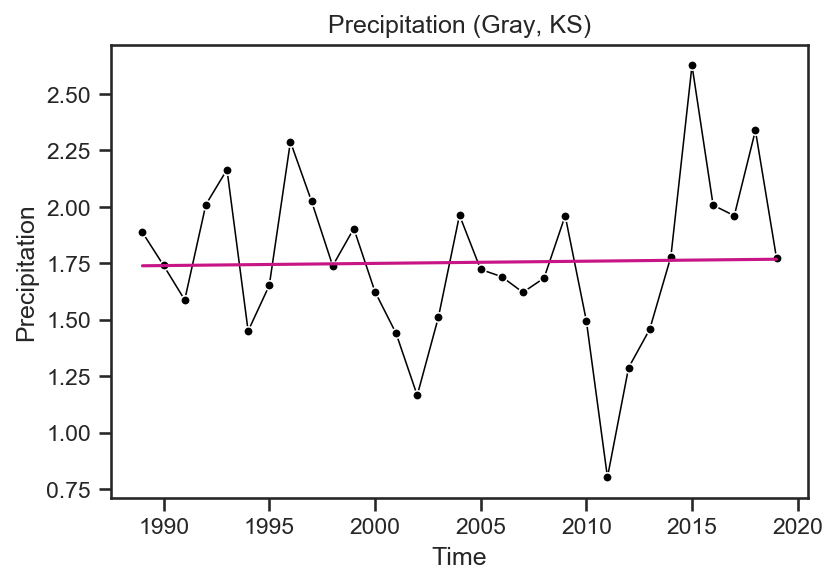

In [115]:
# Gray

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_precipitation_plot = sns.lineplot(x='Year', y='Precipitation', data=df_precipitation_Gray_annual, color='black', marker='o')
annual_precipitation_plot.set(xlabel='Time', ylabel='Precipitation')

# Linear regression
x, y = df_precipitation_Gray_annual['Year'].to_numpy(), df_precipitation_Gray_annual['Precipitation'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='mediumvioletred')
plt.title('Precipitation (Gray, KS)')
plt.show()

R^2 value: 0.005530299821020379
m: [[-0.0029777]]
b: [7.62785166]


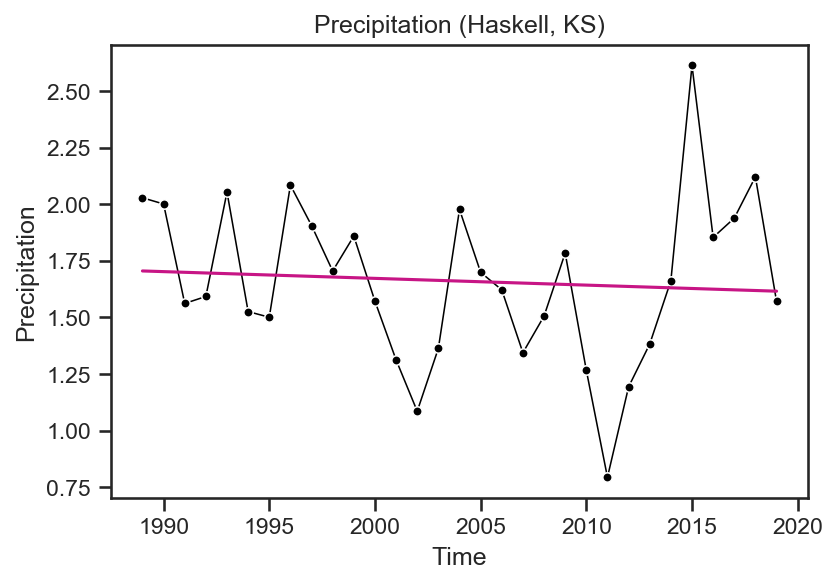

In [116]:
# Haskell

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_precipitation_plot = sns.lineplot(x='Year', y='Precipitation', data=df_precipitation_Haskell_annual, color='black', marker='o')
annual_precipitation_plot.set(xlabel='Time', ylabel='Precipitation')

# Linear regression
x, y = df_precipitation_Haskell_annual['Year'].to_numpy(), df_precipitation_Haskell_annual['Precipitation'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='mediumvioletred')
plt.title('Precipitation (Haskell, KS)')
plt.show()

R^2 value: 0.10182057919355458
m: [[-0.01060475]]
b: [22.83809103]


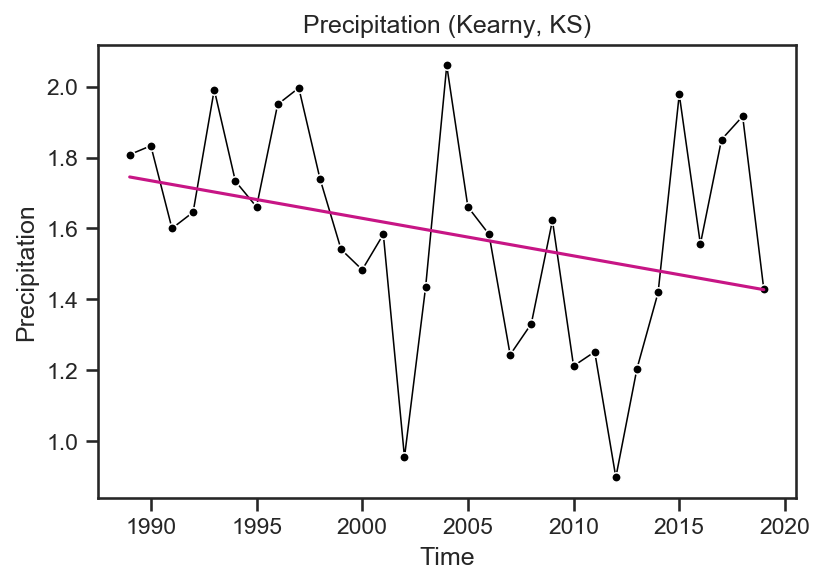

In [117]:
# Kearny

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_precipitation_plot = sns.lineplot(x='Year', y='Precipitation', data=df_precipitation_Kearny_annual, color='black', marker='o')
annual_precipitation_plot.set(xlabel='Time', ylabel='Precipitation')

# Linear regression
x, y = df_precipitation_Kearny_annual['Year'].to_numpy(), df_precipitation_Kearny_annual['Precipitation'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='mediumvioletred')
plt.title('Precipitation (Kearny, KS)')
plt.show()

R^2 value: 0.0540479184758924
m: [[-0.00731885]]
b: [16.14747434]


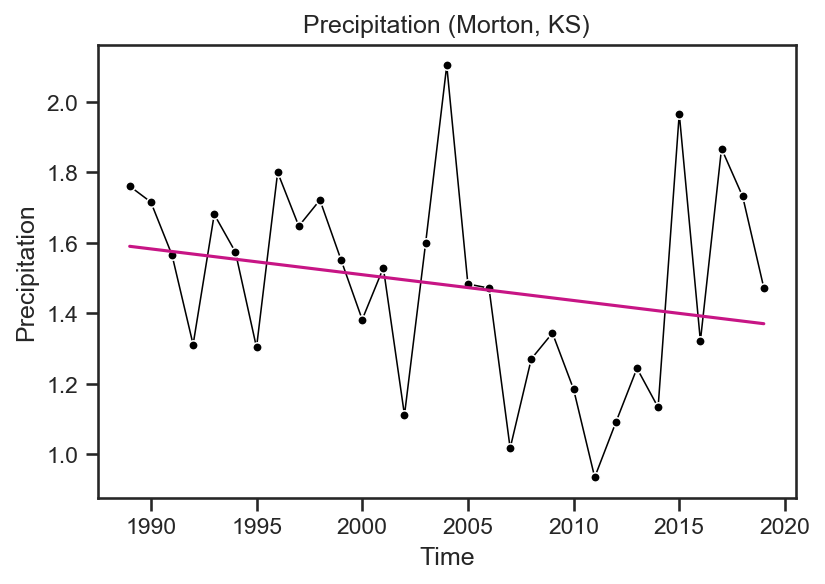

In [118]:
# Morton

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_precipitation_plot = sns.lineplot(x='Year', y='Precipitation', data=df_precipitation_Morton_annual, color='black', marker='o')
annual_precipitation_plot.set(xlabel='Time', ylabel='Precipitation')

# Linear regression
x, y = df_precipitation_Morton_annual['Year'].to_numpy(), df_precipitation_Morton_annual['Precipitation'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='mediumvioletred')
plt.title('Precipitation (Morton, KS)')
plt.show()

#### Drought (PDSI), with data from 1989 onwards (annual)

In [130]:
df_drought_KS = pd.read_csv("Data_KS_WA/KS/KS_Climate/KS_PDSI.csv", skiprows=3).drop(['Anomaly'], axis=1)
df_drought_KS.rename(columns={'Value':'PDSI'}, inplace=True)
df_drought_KS['Year'] = df_drought_KS['Date'].apply(lambda x: int(str(x)[:4]))
df_drought_KS['Month'] = df_drought_KS['Date'].apply(lambda x: int(str(x)[-2:]))
df_drought_KS = df_drought_KS.drop(['Date'], axis=1)

# Testing (drought)
#df_drought_KS.head()

In [131]:
df_drought_KS['Month'] = df_drought_KS.Month.map('{:02}'.format)
df_drought_KS['Day'] = 1
df_drought_KS['Date'] = pd.to_datetime(df_drought_KS[['Year', 'Month', 'Day']])
df_drought_KS['month_year'] = pd.to_datetime(df_drought_KS['Date']).dt.to_period('M')

In [132]:
# Annual drought

df_drought_KS_annual = df_drought_KS[['Date', 'PDSI']]
df_drought_KS_annual = df_drought_KS_annual.set_index('Date').resample('A').mean()
df_drought_KS_annual.reset_index(level=0, inplace=True)
df_drought_KS_annual['Year'] = df_drought_KS_annual['Date'].dt.year

R^2 value: 0.004673078085799975
m: [[-0.0172102]]
b: [35.32876014]


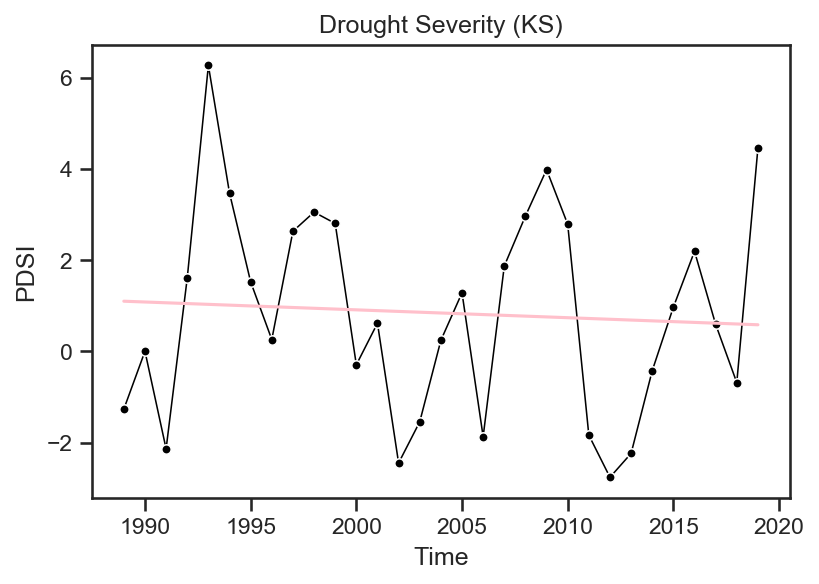

In [133]:
sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

annual_drought_plot = sns.lineplot(x='Year', y='PDSI', data=df_drought_KS_annual, color='black', marker='o')
annual_drought_plot.set(xlabel='Time', ylabel='PDSI')

# Linear regression
x, y = df_drought_KS_annual['Year'].to_numpy(), df_drought_KS_annual['PDSI'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='pink')
plt.title('Drought Severity (KS)')
plt.show()